In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import markers
import seaborn as sns
import textwrap
import math

In [84]:
# import data straight from .xlsx file
# this is using a temporary test data source for now
# windows
df = pd.read_excel(r'C:/Users/IainPlace/programming/python/yield_data_script/yield_data.xlsx',)
# linux
#df = pd.read_excel(r'/home/iain/programming/python/yield_data.xlsx',)


In [3]:
# for loop to generate number of harvests, means/medians and std. deviations for the cropList variable
# sort index by date

dates = ['2023-1-1', '2023-12-31']
df = df.sort_index()
df_date = df.loc[df['date'].between(dates[0],dates[1])]

cropList = ["Micro Amaranth Red Aztec",
            "Micro Basil Salvo",
            "Micro Coriander Splits",
            "Micro Rocket Victoria"]

# initiate lists
noList = []
meanList = []
stdList = []
maxCrop = []
minDay = []
maxDay = []
for crop in cropList:
    # go through each crop in cropList
    for item in df_date.loc[df_date['crop'] == crop]:
        # create a temp dataframe for each crop
        df_temp = df_date.loc[df_date['crop'] == crop]
        cropNo = df_temp.shape[0]
        cropMean = df_temp["yield"].mean()
        cropStd = df_temp["yield"].std()
        tempcropMax = df_temp["yield"].max()
        tempdayMin = df_temp["towerDays"].min()
        tempdayMax = df_temp["towerDays"].max()
    # append values from temporary variables to lists
    noList.append(cropNo)
    meanList.append(cropMean)
    stdList.append(cropStd)
    maxCrop.append(tempcropMax)
    minDay.append(tempdayMin)
    maxDay.append(tempdayMax)

# convert lists into a dataframe
listlists = noList, meanList, stdList
df_McropData = pd.DataFrame(listlists)
# set column titles as croplist
df_McropData.columns = cropList
# set row titles
rows = "No. harvests", "Mean yield (g)", "Std. deviation"
df_McropData.index = rows
# reduce number of decimal places to 2
df_McropData = df_McropData.round(2)


df_McropData.head()
#print(df_cropData)

,Micro Amaranth Red Aztec,Micro Basil Salvo,Micro Coriander Splits,Micro Rocket Victoria
No. harvests,13.00,9.00,15.00,12.00
Mean yield (g),69.10,117.23,60.97,72.86
Std. deviation,30.55,19.22,20.22,29.83


In [51]:
# figures for single cut micro crops
# takes date range from above
df_date = df.loc[df['date'].between(dates[0],dates[1])]

cropList = ["Micro Amaranth Red Aztec",
            "Micro Basil Salvo",
            "Micro Coriander Splits",
            "Micro Rocket Victoria"]

dfList = [df_date.loc[df_date['crop'] == cropList[0]],
          df_date.loc[df_date['crop'] == cropList[1]],
          df_date.loc[df_date['crop'] == cropList[2]],
          df_date.loc[df_date['crop'] == cropList[3]]]

#set the X axis min and max limit for all figures
dVar = math.ceil(min(minDay))/2
minX = (math.ceil(dVar)-1)*2
dVar = math.ceil(max(maxDay))/2
maxX = (math.ceil(dVar)+1)*2

#set the Y axis max limit for all figures
dVar = math.ceil(max(maxCrop))/20
maxY = (math.ceil(dVar)+1)*20

sns.set(style='darkgrid')
plt.figure(figsize=(9,6))

g0=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[0]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g0= g0.figure
g0.savefig(cropList[0]+'.png', dpi=300)
plt.clf()

g1=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[1]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g1= g1.figure
g1.savefig(cropList[1]+'.png', dpi=300)
plt.clf()

g2=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[2]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g2= g2.figure
g2.savefig(cropList[2]+'.png', dpi=300)
plt.clf()

g3=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[3]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g3= g3.figure
g3.savefig(cropList[3]+'.png', dpi=300)
plt.clf()

<Figure size 900x600 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [ ]:
# figures for single cut full sized crops

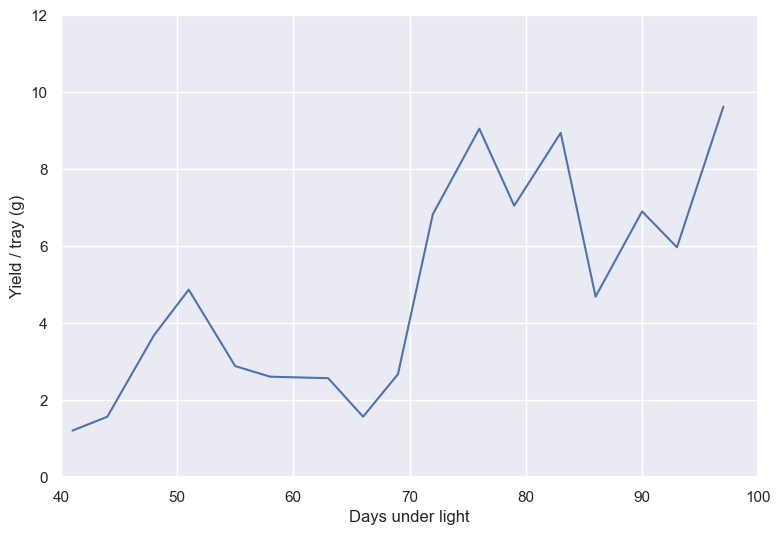

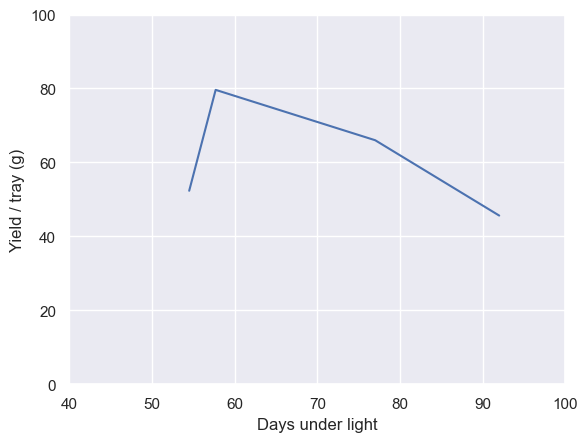

110


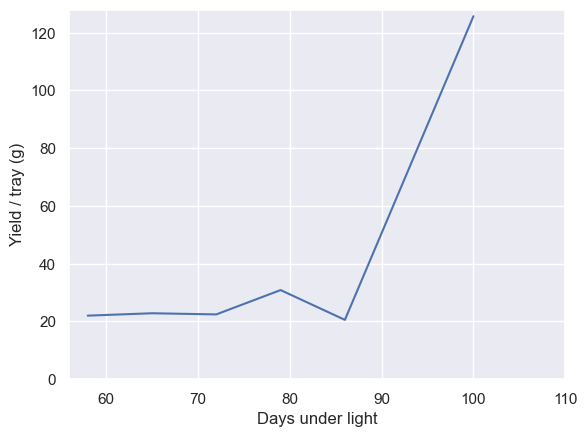

In [93]:
# figures for repeated cut crops
# violas, nasturtiums, mint, chives etc.

sns.set(style='darkgrid')
plt.figure(figsize=(9,6))

###########
# Violas
dfViola = df.loc[df['crop'] == 'Viola']

# lims
# x
minDaysV = dfViola["towerDays"].min()
dVar = math.ceil(minDaysV)/2
minXViola = (math.ceil(dVar)-1)*2
maxDaysV = dfViola["towerDays"].max()
dVar = math.ceil(maxDaysV)/2
maxXViola = (math.ceil(dVar)+1)*2
# y
maxCropV = dfViola["yield"].max()
dVar = math.ceil(maxCropV)/2
maxYViola = (math.ceil(dVar)+1)*2

gViola = sns.lineplot(x='towerDays',
                      y='yield',
                      data=dfViola).set(
       xlim=(minXViola, maxXViola),
       ylim=(0, maxYViola),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
plt.savefig('repeat_viola.png', dpi=300)
plt.show()

###########
# Nasturtiums
dfNast = df.loc[df['crop'] == 'Nasturtium Blue Pepe']
dfNast.head()

# lims
# x
minDaysN = dfNast["towerDays"].min()
dVar = math.ceil(minDaysV)/2
minXNast = (math.ceil(dVar)-1)*2
maxDaysN = dfNast["towerDays"].max()
dVar = math.ceil(maxDaysV)/2
maxXNast = (math.ceil(dVar)+1)*2
# y
maxCropV = dfNast["yield"].max()
dVar = math.ceil(maxCropV)/20
maxYNast = (math.ceil(dVar)+1)*20

gNast = sns.lineplot(x='towerDays',
                      y='yield',
                      data=dfNast).set(
       xlim=(minXNast, maxXNast),
       ylim=(0, maxYNast),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
plt.savefig('repeat_nasturtium.png', dpi=300)
plt.show()

###########
# Greenmint
dfGMint = df.loc[df['crop'] == 'Green Mint']
# lims
# x
minDaysG = dfGMint["towerDays"].min()
dVar = math.ceil(minDaysG)/2
minXGMint = (math.ceil(dVar)-1)*2
maxDaysG = dfGMint["towerDays"].max()
dVar = math.ceil(maxDaysG)/2
maxXGMint = (math.ceil(dVar)+5)*2
print(maxXGMint)
# y
maxCropGMint = dfGMint["yield"].max()
dVar = math.ceil(maxCropGMint)/2
maxYGMint = (math.ceil(dVar)+1)*2

gViola = sns.lineplot(x='towerDays',
                      y='yield',
                      data=dfGMint).set(
       xlim=(minXGMint, maxXGMint),
       ylim=(0, maxYGMint),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
plt.savefig('repeat_greenmint.png', dpi=300)
plt.show()

In [22]:
### scatter plots for each crop combined
# takes date range from above
df_date = df.loc[df['date'].between(dates[0],dates[1])]
# select only crops in the list above
df_datecrop = df_date.loc[df_date['crop'].isin(cropList)]

#set the X axis min and max limit for all figures
dVar = math.ceil(min(minDay))/2
minX = (math.ceil(dVar)-1)*2
dVar = math.ceil(max(maxDay))/2
maxX = (math.ceil(dVar)+1)*2

#set the Y axis max limit for all figures
dVar = math.ceil(max(maxCrop))/20
maxY = (math.ceil(dVar)+1)*20

sns.set(style='darkgrid')
plt.figure(figsize=(9,6))

gCombined=sns.lmplot(x='towerDays',
                     y='yield',
                     hue='crop',
                     legend=True,
                     markers="x",
                     ci=None,
                     data=df_datecrop)
gCombined.set(xlim=(minX,maxX),
              ylim=(0, maxY),
              xlabel="Days under light",
              ylabel="Yield / tray (g)")
gCombined = gCombined.figure
gCombined.savefig("combined.png", dpi=300)
plt.clf()
 
#g0=sns.lmplot(x='towerDays',
#              y='yield', 
#              hue='crop',
#              legend=False,
#              markers="+",
#              ci=None,
#              data=dfList[0])
#g0.set(xlim=(minX,maxX),
#       ylim=(0, maxY),
#       xlabel="Days under light",
#       ylabel="Yield / tray (g)")
#g0= g0.figure
#g0.savefig(cropList[0]+'.png', dpi=300)
#plt.clf()

<Figure size 900x600 with 0 Axes>

<Figure size 735.75x500 with 0 Axes>

In [ ]:
# scatter plots for each crop in a for list


# takes date range from above
df_date = df.loc[df['date'].between(dates[0],dates[1])]
# select only crops in the list above
df_datecrop = df_date.loc[df_date['crop'].isin(cropList)]

